In [170]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [171]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [172]:
NUM_CLASSES = 2

# Dataset reading

In [173]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21*2 + 21*2 + 9*2) + 1)))

In [174]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [176]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 9*2, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [177]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2 + 21*2 + 9*2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(76, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [178]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_19 (Dropout)        (None, 102)               0         
                                                                 
 dense_27 (Dense)            (None, 20)                2060      
                                                                 
 dropout_20 (Dropout)        (None, 20)                0         
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 2)                 22        
                                                                 
Total params: 2292 (8.95 KB)
Trainable params: 2292 (8.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [179]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [180]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [181]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 0.9321 - accuracy: 0.4800
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 1s 1s/step - loss: 0.9321 - accuracy: 0.4800 - val_loss: 0.8617 - val_accuracy: 0.4400
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 0.9035 - accuracy: 0.4933
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 99ms/step - loss: 0.9035 - accuracy: 0.4933 - val_loss: 0.8241 - val_accuracy: 0.4400
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 0.8566 - accuracy: 0.5467
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5


C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 90ms/step - loss: 0.8566 - accuracy: 0.5467 - val_loss: 0.7891 - val_accuracy: 0.4400
Epoch 4/30
1/1 [==============================] - ETA: 0s - loss: 0.7557 - accuracy: 0.6133
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 83ms/step - loss: 0.7557 - accuracy: 0.6133 - val_loss: 0.7580 - val_accuracy: 0.4400
Epoch 5/30
1/1 [==============================] - ETA: 0s - loss: 0.8429 - accuracy: 0.5200
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 59ms/step - loss: 0.8429 - accuracy: 0.5200 - val_loss: 0.7303 - val_accuracy: 0.4400
Epoch 6/30
1/1 [==============================] - ETA: 0s - loss: 0.8565 - accuracy: 0.4800
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 75ms/step - loss: 0.8565 - accuracy: 0.4800 - val_loss: 0.7078 - val_a

In [182]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 23ms/step - loss: 0.5671 - accuracy: 0.6800


In [183]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [184]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 86ms/step
[0.5296166  0.47038338]
0


# Confusion matrix

1/1 [==============================] - 0s 35ms/step


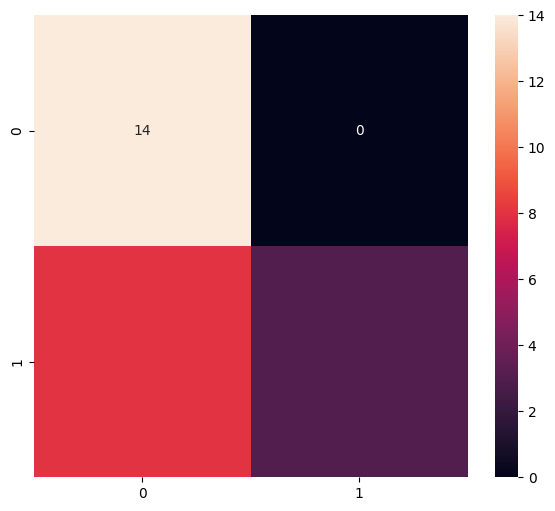

Classification Report
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        14
           1       1.00      0.27      0.43        11

    accuracy                           0.68        25
   macro avg       0.82      0.64      0.60        25
weighted avg       0.80      0.68      0.62        25



In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [186]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [187]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmp6eh69blu\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmp6eh69blu\assets


5304

# Inference test

In [188]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [189]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [190]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [191]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [192]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.5309844  0.46901566]
0
